<a href="https://colab.research.google.com/github/diegorodriguez31/database_inha/blob/main/WEEK11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [2]:
with con:
  con.execute("""
  CREATE TABLE USER(id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
  name TEXT,
  age INTEGER
  );""")

In [3]:
sql = 'INSERT INTO USER (id, name, age) values (?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [4]:
with con:
  con.executemany(sql,data)

In [6]:
with con:
  data = con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [7]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [8]:
df_skill.to_sql('SKILL',con)
df = pd.read_sql('''
SELECT s.user_id, u.name, u.age, s.skill
FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id''', con)

In [9]:
df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [10]:
df.to_sql('USER_SKILL', con)

In [11]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [12]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [13]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [14]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [15]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [16]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [17]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [18]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:07:22,21.349308376196543
2021-06-28 09:07:22,23.25896771124574
2021-06-29 09:07:22,18.710175218887155
2021-06-30 09:07:22,22.455485947722753
2021-07-01 09:07:22,24.251888392740163


In [19]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:07:22.814627,21.349308376196543
2021-06-28 09:07:22.814627,23.25896771124574
2021-06-29 09:07:22.814627,18.710175218887155
2021-06-30 09:07:22.814627,22.455485947722753
2021-07-01 09:07:22.814627,24.251888392740163
2021-07-02 09:07:22.814627,24.51595489211599
2021-07-03 09:07:22.814627,23.05586063636289
2021-07-04 09:07:22.814627,23.426465265536365
2021-07-05 09:07:22.814627,21.768673514538257
2021-07-06 09:07:22.814627,21.040651060900124


In [20]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:07:22.814627,21.349308376196543
2021-06-28 09:07:22.814627,23.25896771124574
2021-06-29 09:07:22.814627,18.710175218887155
2021-06-30 09:07:22.814627,22.455485947722753
2021-07-01 09:07:22.814627,24.251888392740163
2021-07-02 09:07:22.814627,24.51595489211599
2021-07-03 09:07:22.814627,23.05586063636289
2021-07-04 09:07:22.814627,23.426465265536365
2021-07-05 09:07:22.814627,21.768673514538257
2021-07-06 09:07:22.814627,21.040651060900124


In [21]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
  AVG(Temperature) AS MEAN_TMP,
  MAX(Temperature) AS MAX_TMP,
  MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.273774962711517,25.946804051532805,18.021857448135542
2022,22.010926911820842,25.93943940053092,18.043171329770967


In [22]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:07:22', '2021-06-28 09:07:22',
               '2021-06-29 09:07:22', '2021-06-30 09:07:22',
               '2021-07-01 09:07:22', '2021-07-02 09:07:22',
               '2021-07-03 09:07:22', '2021-07-04 09:07:22',
               '2021-07-05 09:07:22', '2021-07-06 09:07:22',
               ...
               '2022-10-30 09:07:22', '2022-10-31 09:07:22',
               '2022-11-01 09:07:22', '2022-11-02 09:07:22',
               '2022-11-03 09:07:22', '2022-11-04 09:07:22',
               '2022-11-05 09:07:22', '2022-11-06 09:07:22',
               '2022-11-07 09:07:22', '2022-11-08 09:07:22'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

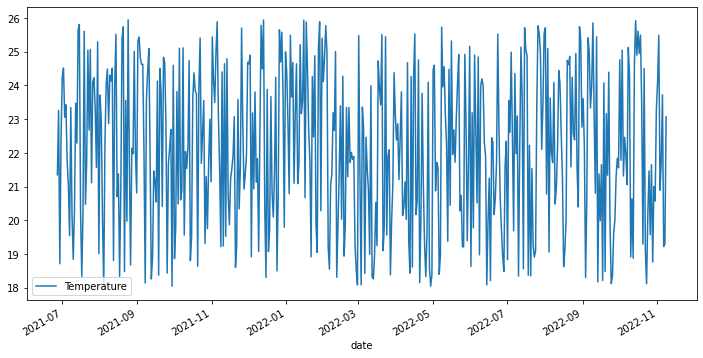

In [23]:
df.plot(figsize=(12, 6))